In [113]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data.apply(lambda x: sum(x.isnull()), axis = 0)
# we got the number of missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
# train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)

# train_data.apply(lambda x: sum(x.isnull()), axis = 0)
# #here we imputed the missing values in column LoanAmount

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

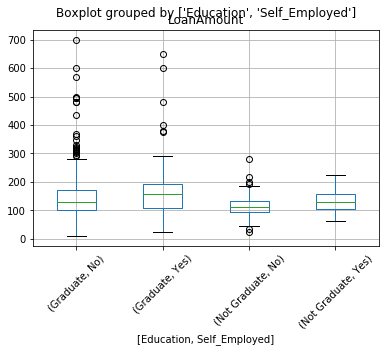

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

train_data.boxplot(column='LoanAmount', by=['Education','Self_Employed'])
plt.xticks(rotation=45)
#this plot shows the LoanAmount spread according to the cadidates education status and employement status

In [115]:
train_data['Self_Employed'].value_counts()

# so here we can see that 86% values are 'No', so its safe to impute the missing values to 'No'

train_data['Self_Employed'].fillna('No', inplace = True)

train_data.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [116]:
pivot_t = train_data.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', 
                                 aggfunc=np.median)
print(pivot_t)

pivot_t2 = train_data.pivot_table(values = 'LoanAmount', index = ['Self_Employed', 'Education'], 
                                  aggfunc=np.median)
print(pivot_t2)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0
                            LoanAmount
Self_Employed Education               
No            Graduate           130.0
              Not Graduate       113.0
Yes           Graduate           157.5
              Not Graduate       130.0


In [117]:
#now we'll replace the missing values

#function to return values from above pivot table
def return_value(x):
    return pivot_t.loc[x['Self_Employed'],x['Education']]

#replacing
train_data['LoanAmount'].fillna(train_data[train_data['LoanAmount'].isnull()].apply(return_value, axis=1), inplace=True)

train_data.apply(lambda x: sum(x.isnull()), axis = 0)

#NOTE: this will only work if you havent filled the LoanAmount variable using mean. Which we did earlier

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

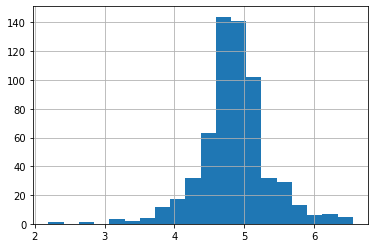

In [118]:
#handling extreme values

#LoanAmount - here instead of treating the extreme values as outliers, we will try to nullify their effect using log transformation
# #before
# train_data['LoanAmount'].hist(bins=50)

train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
#after
train_data['LoanAmount_log'].hist(bins=20)
#now the distribution looks much closer to normal and the effect of outliers has been significantly subsided

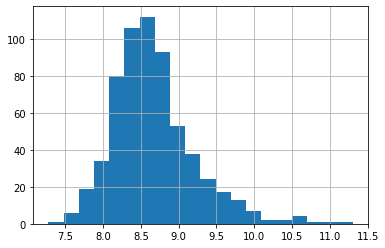

In [119]:
#Applicant_Income - here our intuition is that an applicant can have lower income but strong support co-applicant.
#so it might be a good idea to combine both incomes as total income and take log transformation of the same.

train_data['total_income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']

train_data['total_income_log'] = np.log(train_data['total_income'])

train_data['total_income_log'].hist(bins=20)

In [120]:
#filling remaining missing values -Gender, Married, Dependents, Loan_Amount_Term, Credit_History

train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

train_data.apply(lambda x: sum(x.isnull()), axis = 0)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
total_income         0
total_income_log     0
dtype: int64

In [121]:
#before we go on building our prediction model, we first need to convert all our categorical variables 
#into numeric by encoding the categories

from sklearn.preprocessing import LabelEncoder

variables = ['Gender', 'Married', 'Self_Employed', 'Dependents','Education', 'Property_Area', 'Loan_Status']

le = LabelEncoder()

for x in variables:
    train_data[x] = le.fit_transform(train_data[x])

train_data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
total_income         float64
total_income_log     float64
dtype: object

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors], data[outcome])
    
    prediction=model.predict(data[predictors])
    accuracy = accuracy_score(prediction,data[outcome])
    print("Accuracy score: ", accuracy)
    print(model)
    
model1 = LogisticRegression()
predictors1 = ['Credit_History']
outcome = 'Loan_Status'
classification_model(model1, train_data, predictors1, outcome)

more_predictors = ['Credit_History', 'Education','Married', 'Self_Employed', 'Property_Area']
classification_model(model1, train_data, more_predictors, outcome)


Accuracy score:  0.8094462540716613
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy score:  0.8094462540716613
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


/home/apoorva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/apoorva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [123]:
model2 = DecisionTreeClassifier()
predictors2 = ['Credit_History','Gender','Married','Education']
classification_model(model2, train_data, predictors2, outcome)

more_predictors2 = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model2, train_data, more_predictors2, outcome)

Accuracy score:  0.8094462540716613
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Accuracy score:  0.8892508143322475
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [124]:
model3 = RandomForestClassifier()
predictors3 = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed',
               'Loan_Amount_Term', 'Credit_History', 'Property_Area',
               'LoanAmount_log','total_income_log']
classification_model(model3, train_data, predictors3, outcome)

Accuracy score:  0.9869706840390879
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/home/apoorva/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
